# Homework 1
---
Jordan Ott

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import pandas as pd

np.random.seed(0)

# Problem 1

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,:-1] # features are the other columns

print('Number of data points:',X.shape[0],'Number of features:',X.shape[1])

Number of data points: 148 Number of features: 4


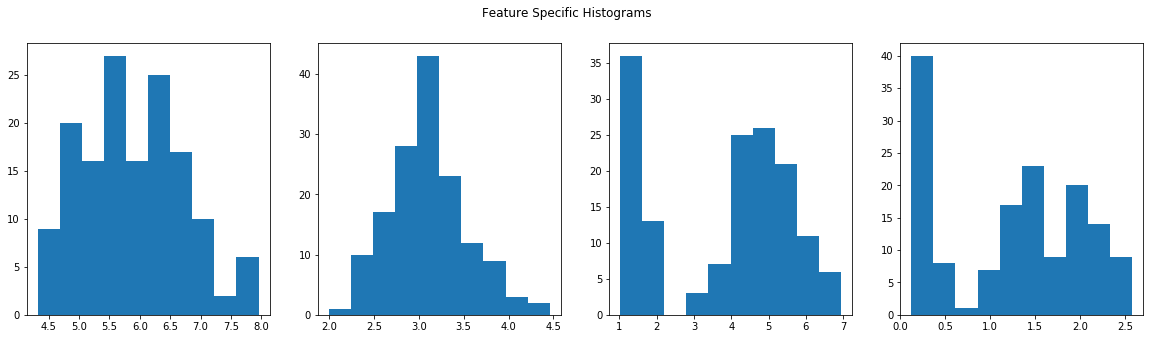

In [3]:
fig=plt.figure(figsize=(20,5))
for i in range(1,X.shape[1]+1):
    ax=fig.add_subplot(1,4,i)        
    ax.hist(X[:,i-1])

fig.suptitle('Feature Specific Histograms') # or plt.suptitle('Main title')
plt.show()

In [4]:
print('Mean:',X.mean(axis=0),'\nSTD:',X.std(axis=0))

Mean: [5.90010376 3.09893092 3.81955484 1.25255548] 
STD: [0.83340207 0.43629184 1.75405711 0.75877246]


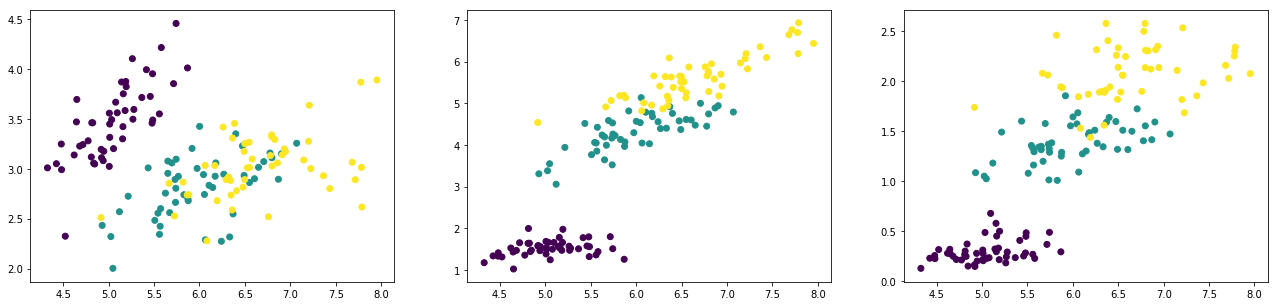

In [5]:
fig=plt.figure(figsize=(30,5))

for i in range(1,X.shape[1]):
    ax=fig.add_subplot(1,4,i)        
    ax.scatter(X[:,0],X[:,i],c=Y)
    
plt.show()

# Problem 2

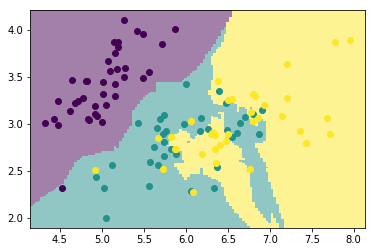

In [6]:
### 1 ###
K = 5
X,Y = ml.shuffleData(X,Y)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75)

knn = ml.knn.knnClassify( Xtr[:,:2], Ytr, K)
YvaHat = knn.predictSoft( Xva[:,:2] )
ml.plotClassify2D( knn, Xtr[:,:2], Ytr )

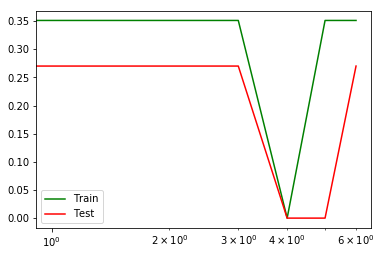

In [7]:
### 2 ###
errTrain,errTest = [],[]
K=[1,2,5,10,50,100,200]

for i,k in enumerate(K):
    learner = ml.knn.knnClassify( Xtr[:,:2], Ytr, k)
    YtrHat = learner.predictSoft( Xtr[:,:2] )
    YvaHat = learner.predictSoft( Xva[:,:2] )
    
    train_err = np.sum(Ytr == np.argmax(YtrHat)) / float(len(YtrHat))
    test_err = np.sum(Yva == np.argmax(YvaHat)) / float(len(YvaHat))
    
    errTrain.append(train_err)
    errTest.append(test_err)
                       
plt.semilogx(errTrain,c='green',label='Train')
plt.semilogx(errTest,c='red',label='Test')
plt.legend()
None

**Q:** Based on these plots, what value of K would you recommend?  
**A:** $K=50$, where the train and test error are both minimized

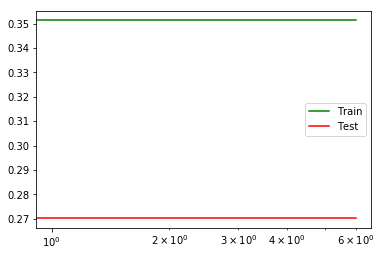

In [8]:
### 3 ###
errTrain,errTest = [],[]
K=[1,2,5,10,50,100,200]

for i,k in enumerate(K):
    learner = ml.knn.knnClassify( Xtr, Ytr, k)
    YtrHat = learner.predictSoft( Xtr )
    YvaHat = learner.predictSoft( Xva )
    
    train_err = np.sum(Ytr == np.argmax(YtrHat)) / float(len(YtrHat))
    test_err = np.sum(Yva == np.argmax(YvaHat)) / float(len(YvaHat))
    
    errTrain.append(train_err)
    errTest.append(test_err)
                       
plt.semilogx(errTrain,c='green',label='Train')
plt.semilogx(errTest,c='red',label='Test')
plt.legend()
None

**Q:** Are the plots very different? Is your recommendation different?  
**A:** Yes, here the train error and test error are uniform. Because the errors do not change based on $K$ I would recommend $K=1$ for computational simplicity

# Problem 3

In [9]:
D = [[0,0,1,1,0,-1],[1,1,0,1,0,-1],[0,1,1,1,1,-1],[1,1,1,1,0,-1],[0,1,0,0,0,-1],[1,0,1,1,1,1],[0,0,1,0,0,1],[1,0,0,0,0,1],[1,0,1,1,0,1],[1,1,1,1,1,-1]]
df = pd.DataFrame(data=D, columns=['author','long','research','grade','lottery','read'])

df

,author,long,research,grade,lottery,read
0,0,0,1,1,0,-1
1,1,1,0,1,0,-1
2,0,1,1,1,1,-1
3,1,1,1,1,0,-1
4,0,1,0,0,0,-1
5,1,0,1,1,1,1
6,0,0,1,0,0,1
7,1,0,0,0,0,1
8,1,0,1,1,0,1
9,1,1,1,1,1,-1


In [10]:
### 1 ###
def prob(x, v):
    return x[x == v].shape[0] / float(x.shape[0])

def prob_atr_given_read(df,col,atr_val,r):
    col_given_read = df[df['read'] == r][col]
    return prob(col_given_read,atr_val)

def norm(df, col, atr_val):
    return 

for col in df.columns.tolist()[:-1]:
    x = [round(prob_atr_given_read(df,col,a,r),2) for a,r in [[1,1],[0,1],[1,-1],[0,-1]]]
    
    print('P({}|{}):'.format(col,'read'), x[0],'P(~{}|{}):'.format(col,'read'),x[1],'P({}|~{}):'.format(col,'read'), x[2],'P(~{}|~{}):'.format(col,'read'),x[3] )

# compute priors
read_prior = df[df['read'] == 1].shape[0] / df.shape[0]
nread_prior = df[df['read'] == -1].shape[0] / df.shape[0]

print('P(read):',read_prior,'P(~read):',nread_prior)

P(author|read): 0.75 P(~author|read): 0.25 P(author|~read): 0.5 P(~author|~read): 0.5
P(long|read): 0.0 P(~long|read): 1.0 P(long|~read): 0.83 P(~long|~read): 0.17
P(research|read): 0.75 P(~research|read): 0.25 P(research|~read): 0.67 P(~research|~read): 0.33
P(grade|read): 0.5 P(~grade|read): 0.5 P(grade|~read): 0.83 P(~grade|~read): 0.17
P(lottery|read): 0.25 P(~lottery|read): 0.75 P(lottery|~read): 0.33 P(~lottery|~read): 0.67
P(read): 0.4 P(~read): 0.6


In [11]:
### 2 ###
def naive_bayes(atr,posterior=None):
    r,nr = 1,1
    for atr_val,col in zip(atr,df.columns.tolist()[:-1]):
        nr *= prob_atr_given_read(df,col,atr_val,-1)
        r *= prob_atr_given_read(df,col,atr_val,1) 
    
    r *= read_prior #/ norm(df,col,1)
    nr *= nread_prior #/ norm(df,col,0)
    
    if posterior:
        return r/(r+nr) if posterior == 1 else nr/(r+nr)
    
    return 'Read' if r >= nr else 'Discard'
    
x = [0, 0, 0, 0, 0]
print(naive_bayes(x), x)
x = [1, 1, 0, 1, 0]
print(naive_bayes(x), x)

Read [0, 0, 0, 0, 0]
Discard [1, 1, 0, 1, 0]


In [12]:
### 3 ###
x = [1, 1, 0, 1, 0]
print('P(Read=1|1, 1, 0, 1, 0) = ',naive_bayes(x,posterior=1))

P(Read=1|1, 1, 0, 1, 0) =  0.0


**Q:** Why should we probably not use a “joint” Bayes classifier (using the joint probability of the features x, as
opposed to a naïve Bayes classifier) for these data?  
**A:** We don't have knowledge of how the variables influence each other. Additionally, it is computationally simpler to assume conditional indepedence (hence the 'naïve')

In [13]:
### 5 ###
df = df.drop(columns='author')

x = [0, 0, 0, 0]
print(naive_bayes(x,posterior=1), x)
x = [1, 0, 1, 0]
print(naive_bayes(x,posterior=1), x)

0.9101123595505618 [0, 0, 0, 0]
0.0 [1, 0, 1, 0]


Suppose that, before we make our predictions, we lose access to my address book, so that we cannot tell
whether the email author is known.  
Should we re-train the model, and if so, how? (e.g.: how does the model, and its parameters, change in this new situation?)  
Hint: what will the naïve Bayes model over only features $x_{2} ... x_{5}$ look like, and what will its parameters be?

**A:** The probabilities over $x_{2} ... x_{5}$ will be unaffected because we are assuming conditional independence. However, we should retrain the model, using the four attributes available (length, research, grade, and lotter), since an author is no longer available.

## Statement of Collaboration  
I did not collaborate with anyone